#Instalación e importanción de librerías.

In [1]:
!pip install contractions

In [2]:
!pip install plotly

In [3]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
!pip install pandas-profiling==2.7.1

In [4]:
!pip install scikit-plot

In [20]:
# import important modules
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import contractions


import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve,accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
import scikitplot.metrics as skplt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB # classifier 

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# text preprocessing modules
from string import punctuation 

# text preprocessing modules
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
):
    nltk.download(dependency)
    
import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [6]:
# load data
data = pd.read_csv("clinical_trials_on_cancer_data_clasificacion.csv", sep=',', encoding = 'utf-8')

In [7]:
# show top five rows of data
data.head() 

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...


In [8]:
# check the shape of the data
data.shape

(12000, 2)

In [9]:
# check missing values in data
data.isnull().sum()

label                  0
study_and_condition    0
dtype: int64

In [10]:
# evalute news sentiment distribution
data.label.value_counts()

__label__0    6000
__label__1    6000
Name: label, dtype: int64

#Preparación y limpieza de datos

In [16]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [21]:
data['study_and_condition'] = data['study_and_condition'].apply(contractions.fix) #Aplica la cor

In [22]:
data['cleaned_study_condition'] = data['study_and_condition'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data.head()

,label,study_and_condition,cleaned_study_condition
0,__label__0,study interventions are Saracatinib . recurren...,"[study, interventions, saracatinib, recurrent,..."
1,__label__1,study interventions are Stem cell transplantat...,"[study, interventions, stem, cell, transplanta..."
2,__label__0,study interventions are Lenograstim . recurren...,"[study, interventions, lenograstim, recurrent,..."
3,__label__0,study interventions are Doxorubicin . stage ii...,"[study, interventions, doxorubicin, stage, iii..."
4,__label__1,study interventions are Poly I-C . prostate ca...,"[study, interventions, poly, ic, prostate, can..."


In [23]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

data['cleaned_study_condition'] = data['cleaned_study_condition'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data.head()

,label,study_and_condition,cleaned_study_condition
0,__label__0,study interventions are Saracatinib . recurren...,"[study, interv, saracatinib, recur, verruc, ca..."
1,__label__1,study interventions are Stem cell transplantat...,"[study, interv, stem, cel, transpl, hodgkin, l..."
2,__label__0,study interventions are Lenograstim . recurren...,"[study, interv, lenograstim, recur, adult, dif..."
3,__label__0,study interventions are Doxorubicin . stage ii...,"[study, interv, doxorubicin, stag, ii, diffus,..."
4,__label__1,study interventions are Poly I-C . prostate ca...,"[study, interv, poly, ic, prost, cant, diagnos..."


In [24]:
data['cleaned_study_condition'] = data['cleaned_study_condition'].apply(lambda x: ' '.join(map(str, x)))
data

,label,study_and_condition,cleaned_study_condition
0,__label__0,study interventions are Saracatinib . recurren...,study interv saracatinib recur verruc carcinom...
1,__label__1,study interventions are Stem cell transplantat...,study interv stem cel transpl hodgkin lymphom ...
2,__label__0,study interventions are Lenograstim . recurren...,study interv lenograstim recur adult diffus mi...
3,__label__0,study interventions are Doxorubicin . stage ii...,study interv doxorubicin stag ii diffus larg c...
4,__label__1,study interventions are Poly I-C . prostate ca...,study interv poly ic prost cant diagnos unreso...
...,...,...,...
11995,__label__0,study interventions are Prednisolone hemisucci...,study interv prednisolon hemisuccin recur chil...
11996,__label__0,study interventions are Bevacizumab . recurren...,study interv bevacizumab recur rect cant diagn...
11997,__label__1,"study interventions are Antibodies, Monoclonal...",study interv antibody monoclon recur lymphobla...
11998,__label__0,study interventions are Vorinostat . colorecta...,study interv vorinost colorect cant diagnos pa...


In [26]:
#split features and target from train data 
X = data["cleaned_study_condition"]
y = data.label.values

In [27]:
# split data into train and validate

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
    stratify=y,
)

#Naive Bayes (Optimo)

In [28]:
# The multinomial Naive Bayes classifier is suitable for classification with discrete features
# (e.g., word counts for text classification).

# Create a classifier in pipeline
label_classifier = Pipeline(steps=[
                                 ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('naive_bayes',MultinomialNB())
                                 ])

In [29]:
# train the sentiment classifier 
label_classifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('naive_bayes', MultinomialNB())])

In [30]:
# test model performance on valid data 
y_preds = label_classifier.predict(X_valid)

In [31]:
# evalute model performance by using log_loss in the validation data
accuracy_score(y_valid,y_preds)

0.8061111111111111

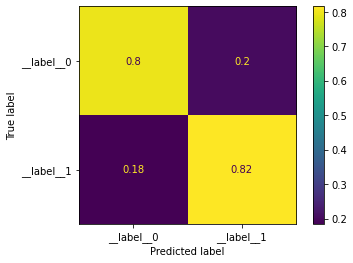

In [32]:
# plot the comfusion matrix
plot_confusion_matrix(label_classifier, X_valid, y_valid, normalize='true')

In [33]:
# check the classification report
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

  __label__0       0.81      0.80      0.80       900
  __label__1       0.80      0.82      0.81       900

    accuracy                           0.81      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.81      0.81      0.81      1800



In [34]:
#save model 
import joblib 

joblib.dump(label_classifier, 'model_pipeline.joblib')

['model_pipeline.joblib']